In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
import pylab
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# converting Date column from object type to datetime type
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Store'] = df['Store'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 402.3+ KB


In [7]:
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,10,2012


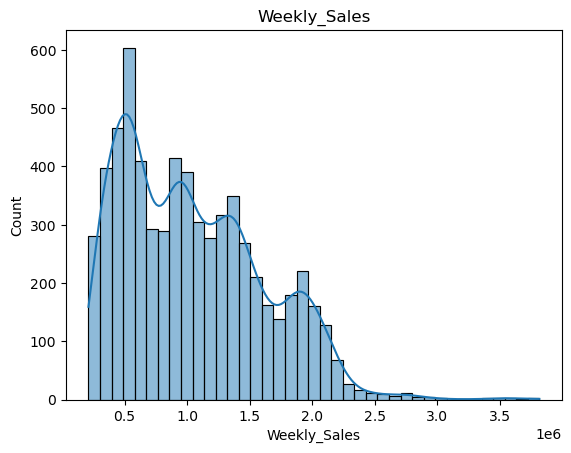

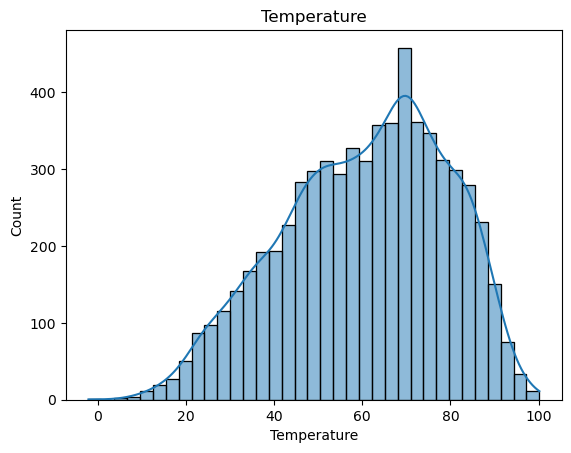

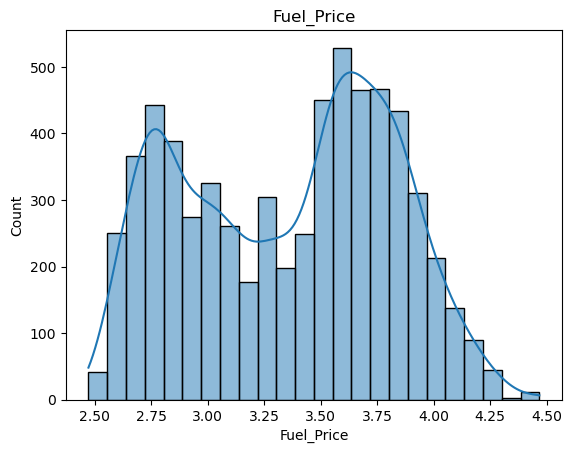

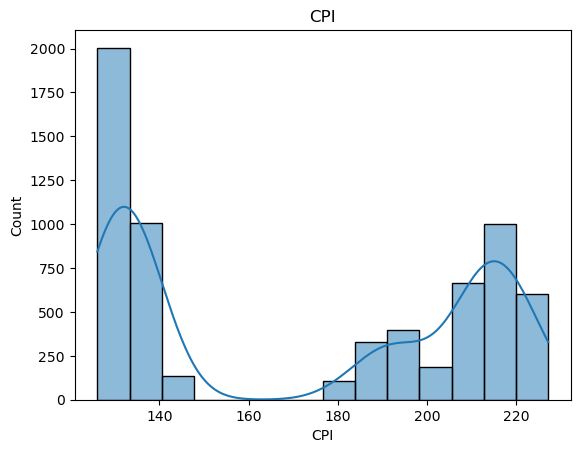

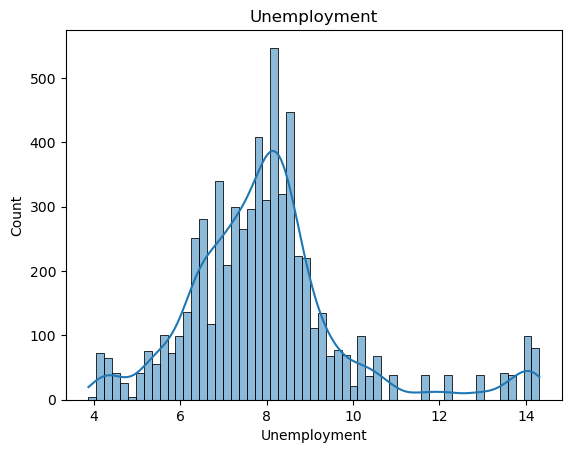

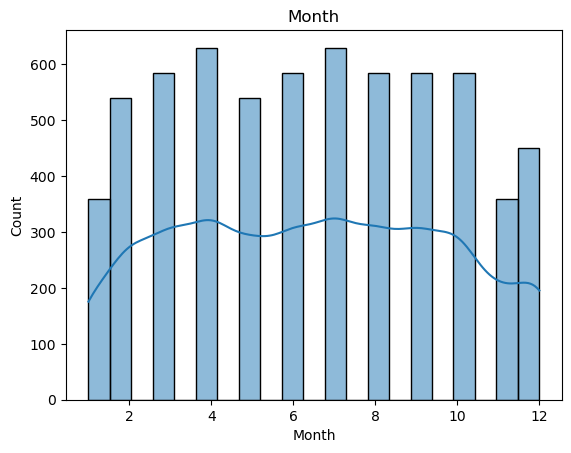

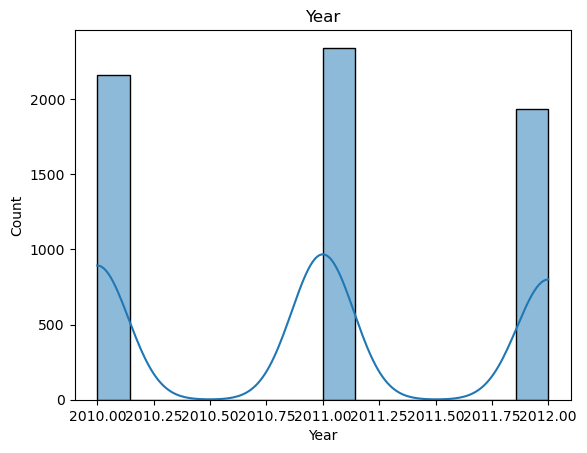

In [8]:
for i in df.columns:
    if df[i].dtype == 'int' or df[i].dtype == 'float':
        sns.histplot(df[i], kde=True)
        plt.title(i)
        plt.show()

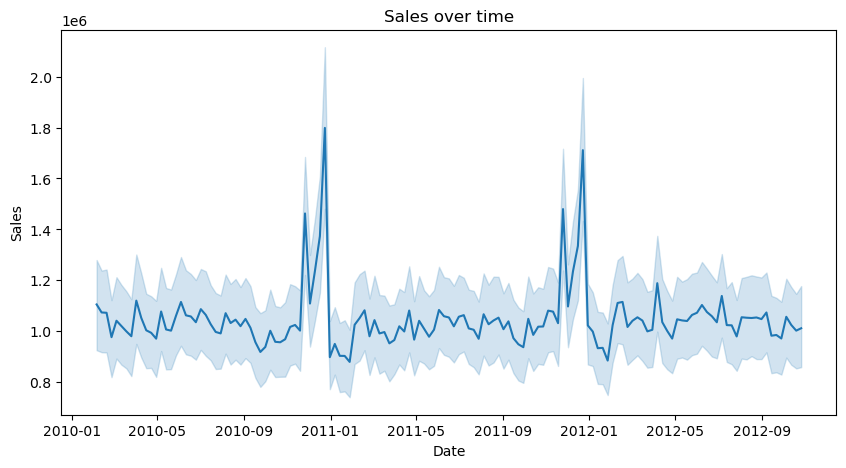

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Weekly_Sales')
plt.title('Sales over time')
plt.ylabel('Sales')
plt.show()

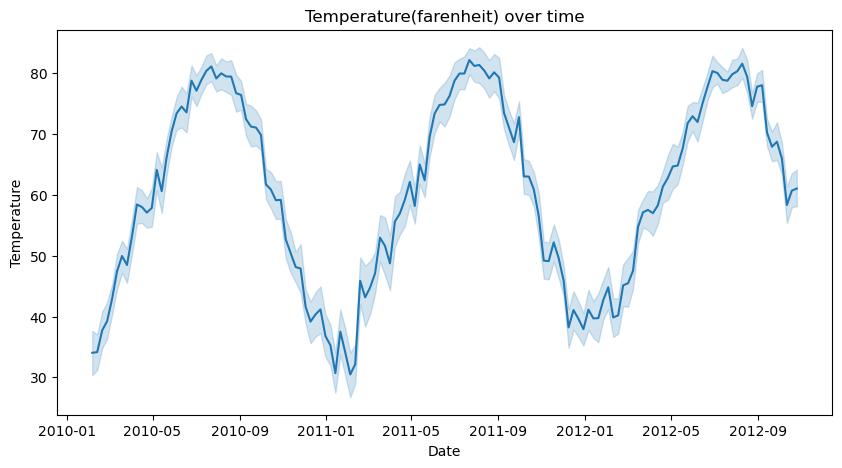

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Temperature')
plt.title('Temperature(farenheit) over time')
plt.show()

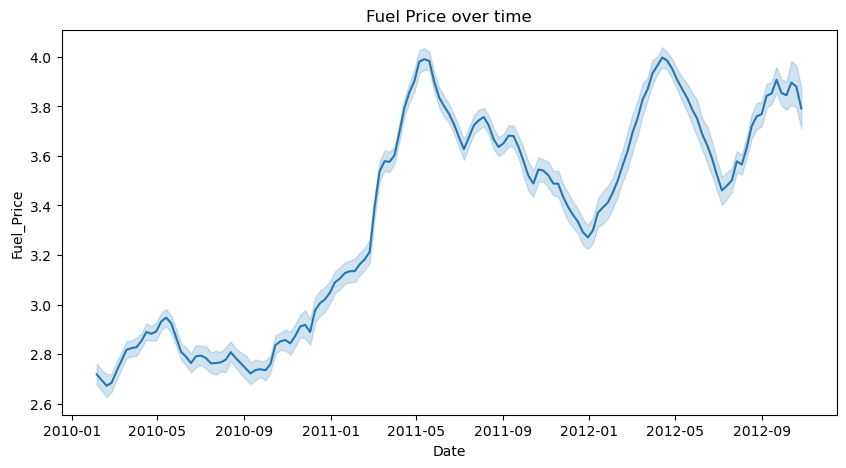

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Fuel_Price')
plt.title('Fuel Price over time')
plt.show()

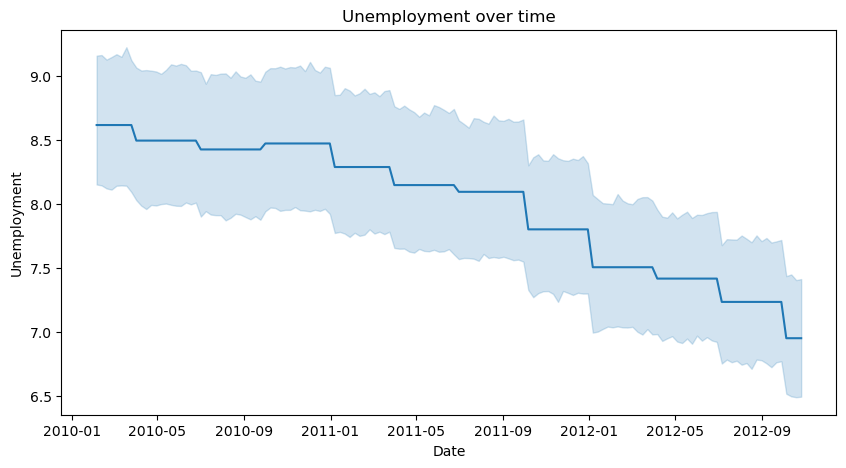

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Unemployment')
plt.title('Unemployment over time')
plt.show()

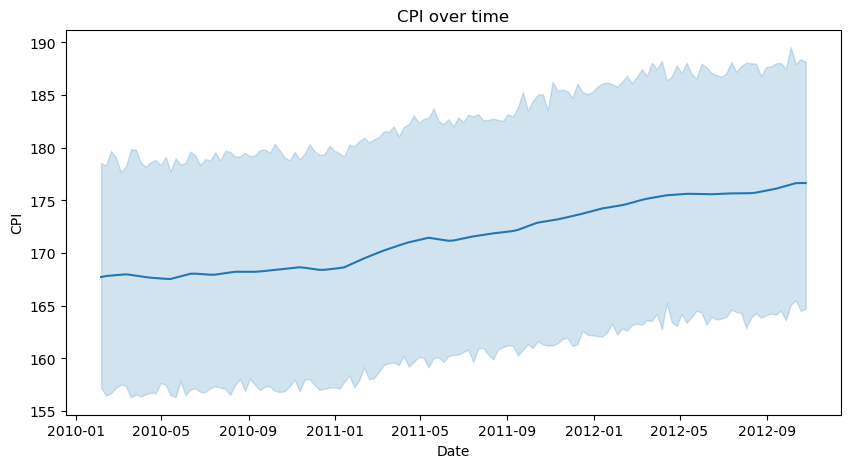

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='CPI')
plt.title('CPI over time')
plt.show()

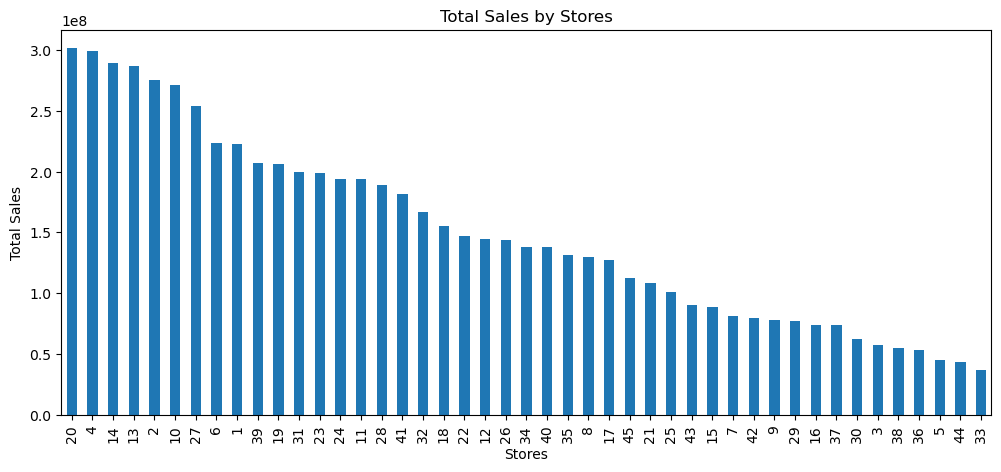

In [14]:
df.groupby(['Store']) ['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,5), width=0.5)
plt.ylabel('Total Sales')
plt.xlabel('Stores')
plt.title('Total Sales by Stores')
plt.show()

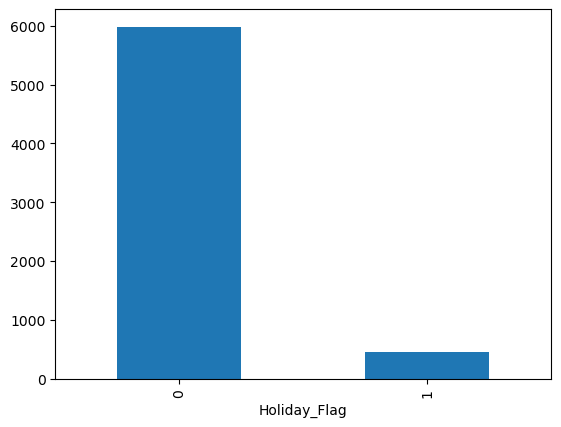

In [15]:
df['Holiday_Flag'].value_counts().plot(kind='bar')
plt.show()

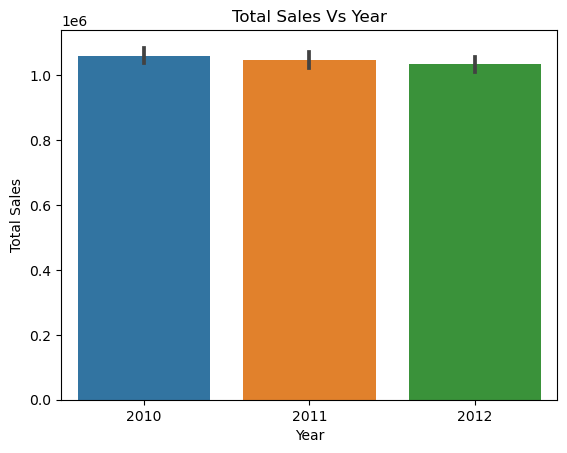

In [16]:
sns.barplot(x='Year', y='Weekly_Sales', data=df)
plt.ylabel('Total Sales')
plt.title('Total Sales Vs Year')
plt.show()

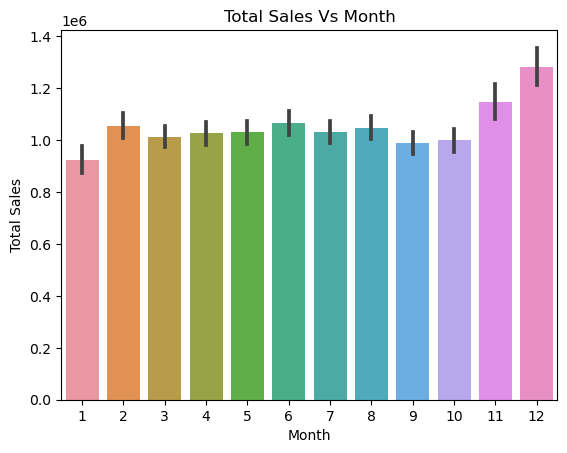

In [17]:
sns.barplot(x='Month', y='Weekly_Sales', data=df)
plt.ylabel('Total Sales')
plt.title('Total Sales Vs Month')
plt.show()

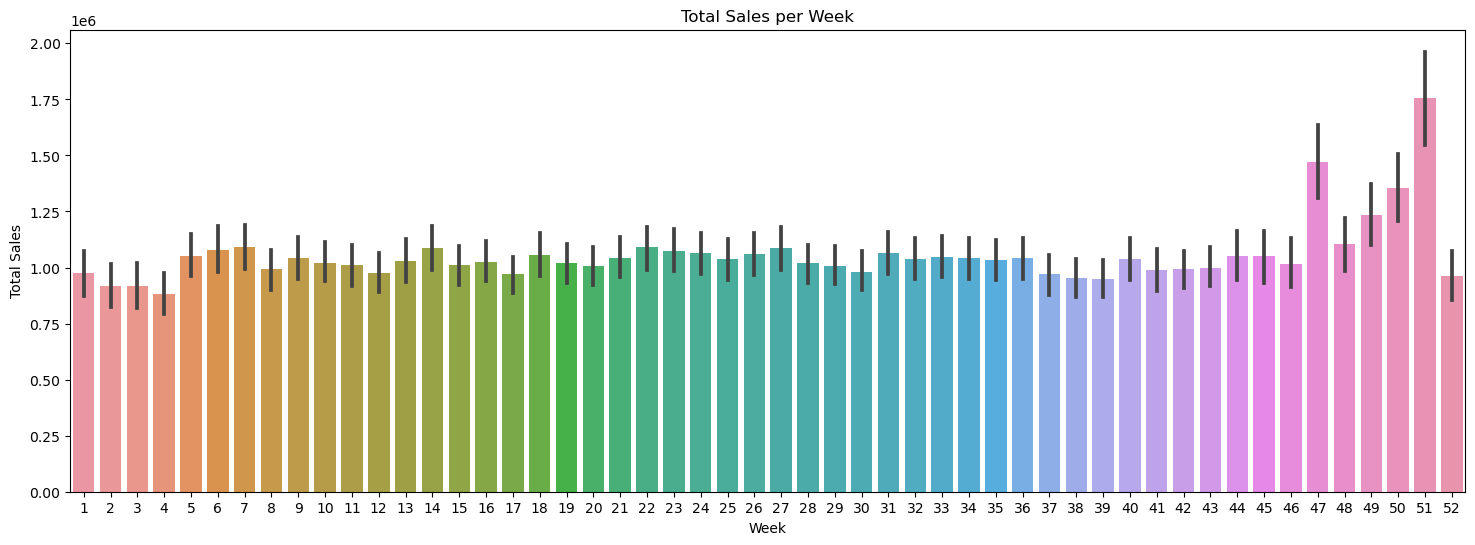

In [18]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Week', y='Weekly_Sales', data=df)
plt.ylabel('Total Sales')
plt.title('Total Sales per Week')
plt.show()

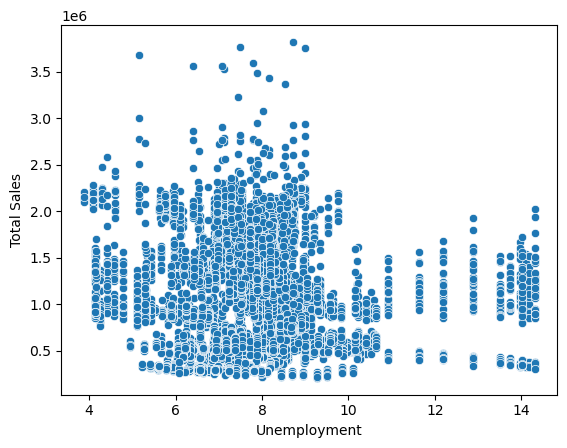

In [19]:
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.ylabel('Total Sales')
plt.show()

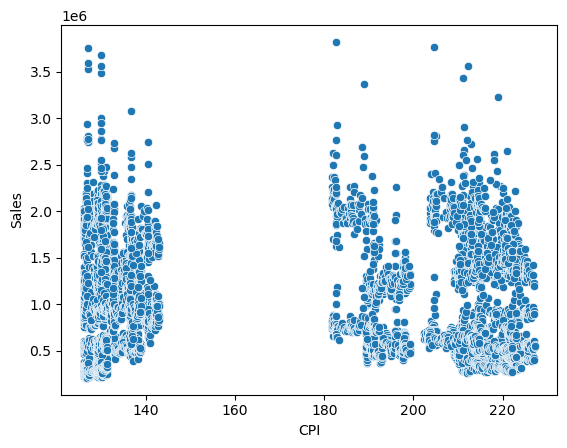

In [20]:
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.ylabel('Sales')
plt.show()

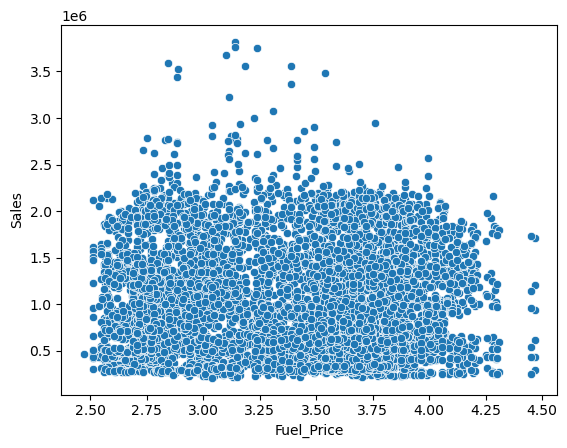

In [21]:
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.ylabel('Sales')
plt.show()

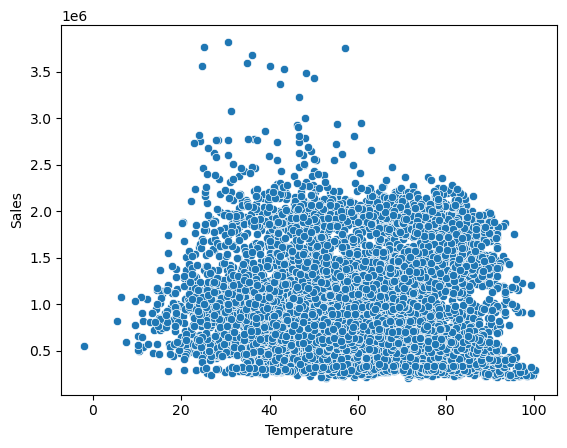

In [22]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.ylabel('Sales')
plt.show()

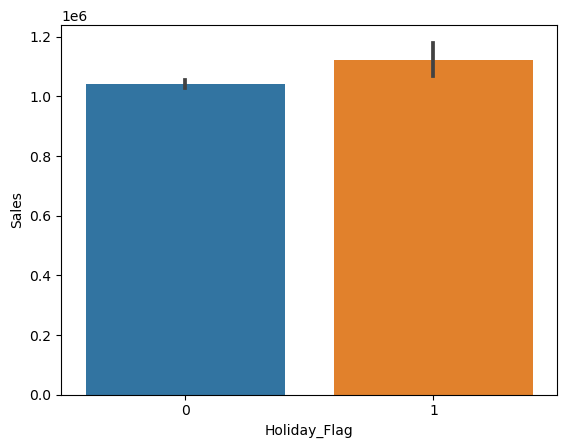

In [23]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.ylabel('Sales')
plt.show()

In [24]:
df_20 = df[df['Store']==20]
df_20

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
2717,20,2010-02-05,2401395.47,0,25.92,2.784,204.247194,8.187,5,2,2010
2718,20,2010-02-12,2109107.90,1,22.12,2.773,204.385747,8.187,6,2,2010
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187,7,2,2010
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187,8,2,2010
2721,20,2010-03-05,2119213.72,0,31.75,2.777,204.494073,8.187,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.58,0,58.65,3.997,215.736716,7.280,39,9,2012
2856,20,2012-10-05,2246411.89,0,60.77,3.985,215.925886,7.293,40,10,2012
2857,20,2012-10-12,2162951.36,0,47.20,4.000,216.115057,7.293,41,10,2012
2858,20,2012-10-19,1999363.49,0,56.26,3.969,216.146470,7.293,42,10,2012


In [25]:
df20 = df_20[['Date','Weekly_Sales']]
df20

,Date,Weekly_Sales
2717,2010-02-05,2401395.47
2718,2010-02-12,2109107.90
2719,2010-02-19,2161549.76
2720,2010-02-26,1898193.95
2721,2010-03-05,2119213.72
...,...,...
2855,2012-09-28,2008350.58
2856,2012-10-05,2246411.89
2857,2012-10-12,2162951.36
2858,2012-10-19,1999363.49


In [26]:
df20.rename(columns={'Date':'ds','Weekly_Sales':'y'},inplace=True)

In [27]:
df20

,ds,y
2717,2010-02-05,2401395.47
2718,2010-02-12,2109107.90
2719,2010-02-19,2161549.76
2720,2010-02-26,1898193.95
2721,2010-03-05,2119213.72
...,...,...
2855,2012-09-28,2008350.58
2856,2012-10-05,2246411.89
2857,2012-10-12,2162951.36
2858,2012-10-19,1999363.49


In [28]:
df20.reset_index(drop=True, inplace=True)

In [29]:
df20

,ds,y
0,2010-02-05,2401395.47
1,2010-02-12,2109107.90
2,2010-02-19,2161549.76
3,2010-02-26,1898193.95
4,2010-03-05,2119213.72
...,...,...
138,2012-09-28,2008350.58
139,2012-10-05,2246411.89
140,2012-10-12,2162951.36
141,2012-10-19,1999363.49


<Axes: >

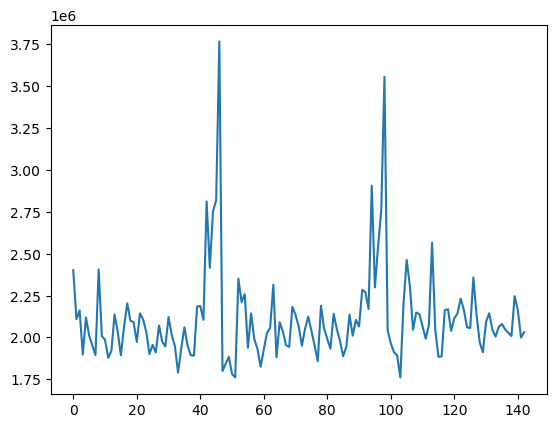

In [30]:
df20['y'].plot()

In [31]:
from statsmodels.tsa.stattools import adfuller
Adfuller_res= adfuller(df20['y'])
Adfuller_res

(-5.393738692854828,
 3.491295283812896e-06,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 3553.6598733693677)

In [33]:
!pip install -q prophet

In [34]:
from prophet import Prophet
model = Prophet()
model.fit(df20)

20:02:29 - cmdstanpy - INFO - Chain [1] start processing
20:02:29 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
503,2013-10-22
504,2013-10-23
505,2013-10-24
506,2013-10-25
507,2013-10-26


In [36]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
503,2013-10-22,2.078145e+06,1.846542e+06,2.303782e+06
504,2013-10-23,2.078672e+06,1.851561e+06,2.290858e+06
505,2013-10-24,2.081327e+06,1.866878e+06,2.308174e+06
506,2013-10-25,2.086222e+06,1.881567e+06,2.305229e+06
507,2013-10-26,2.093412e+06,1.881784e+06,2.313131e+06


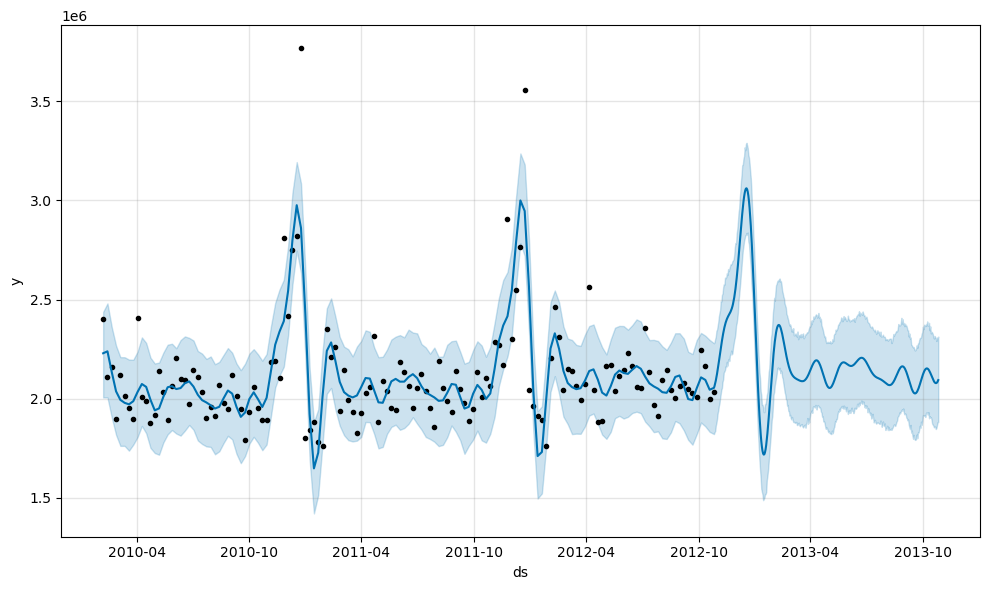

In [37]:
fig1 = model.plot(forecast)

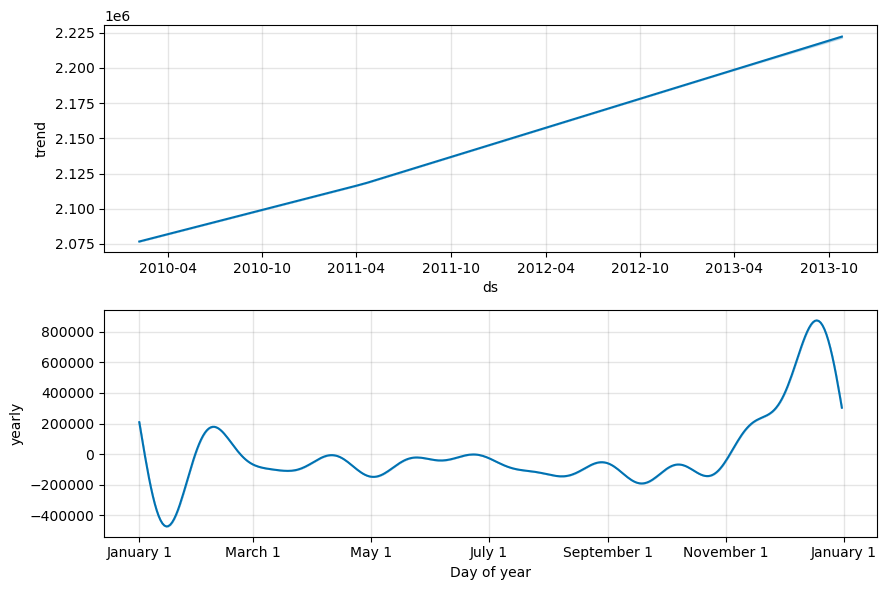

In [38]:
fig2 = model.plot_components(forecast)

In [39]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model,horizon = '122 days', initial='366 days', period='61 days')

  0%|          | 0/9 [00:00<?, ?it/s]

20:02:31 - cmdstanpy - INFO - Chain [1] start processing
20:02:31 - cmdstanpy - INFO - Chain [1] done processing
20:02:31 - cmdstanpy - INFO - Chain [1] start processing
20:02:31 - cmdstanpy - INFO - Chain [1] done processing
20:02:31 - cmdstanpy - INFO - Chain [1] start processing
20:02:32 - cmdstanpy - INFO - Chain [1] done processing
20:02:32 - cmdstanpy - INFO - Chain [1] start processing
20:02:32 - cmdstanpy - INFO - Chain [1] done processing
20:02:33 - cmdstanpy - INFO - Chain [1] start processing
20:02:33 - cmdstanpy - INFO - Chain [1] done processing
20:02:34 - cmdstanpy - INFO - Chain [1] start processing
20:02:34 - cmdstanpy - INFO - Chain [1] done processing
20:02:34 - cmdstanpy - INFO - Chain [1] start processing
20:02:34 - cmdstanpy - INFO - Chain [1] done processing
20:02:34 - cmdstanpy - INFO - Chain [1] start processing
20:02:35 - cmdstanpy - INFO - Chain [1] done processing
20:02:35 - cmdstanpy - INFO - Chain [1] start processing
20:02:35 - cmdstanpy - INFO - Chain [1]

In [40]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-02-25,2.052361e+06,1.806218e+06,2.311268e+06,1938608.52,2011-02-24
1,2011-03-04,2.002251e+06,1.771552e+06,2.251828e+06,2143424.61,2011-02-24
2,2011-03-11,2.002475e+06,1.762173e+06,2.248123e+06,1990932.77,2011-02-24
3,2011-03-18,2.027434e+06,1.781561e+06,2.276935e+06,1931668.64,2011-02-24
4,2011-03-25,2.068699e+06,1.821317e+06,2.325463e+06,1824711.21,2011-02-24


In [41]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,11 days,4.850308e+10,220234.148837,165694.317821,0.079170,0.060597,0.077132,0.800000
1,12 days,4.855108e+10,220343.094730,165903.744743,0.078846,0.060597,0.077055,0.800000
2,13 days,4.844141e+10,220094.098378,165449.929412,0.078184,0.058308,0.076619,0.800000
3,14 days,4.864191e+10,220549.104479,166600.834419,0.078764,0.058308,0.077224,0.800000
4,15 days,4.863229e+10,220527.305877,164566.670562,0.077236,0.057373,0.075948,0.800000
...,...,...,...,...,...,...,...,...
107,118 days,1.904974e+10,138020.808079,109034.497449,0.049759,0.041717,0.049653,0.800000
108,119 days,4.012630e+10,200315.507111,136916.488867,0.056197,0.041717,0.056920,0.733333
109,120 days,4.130927e+10,203246.815556,141051.392965,0.058741,0.045815,0.058920,0.733333
110,121 days,4.077446e+10,201926.857573,136641.242269,0.056585,0.033836,0.056826,0.733333


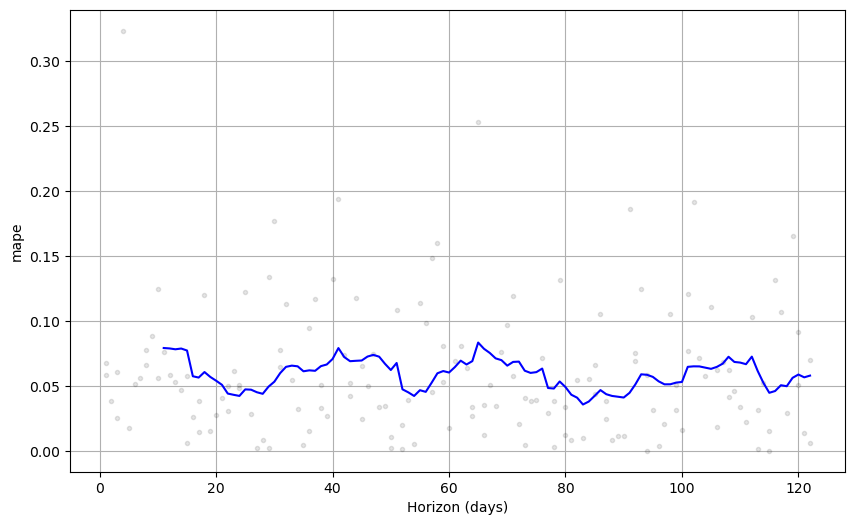

In [42]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape', point_color='black', )

In [43]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,10,2012


In [46]:
from pycaret.regression import *
s = setup(df, target = 'Weekly_Sales', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Weekly_Sales
2,Target type,Regression
3,Original data shape,"(6435, 11)"
4,Transformed data shape,"(6435, 13)"
5,Transformed train set shape,"(4504, 13)"
6,Transformed test set shape,"(1931, 13)"
7,Numeric features,8
8,Date features,1
9,Categorical features,1


In [47]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,53657.1038,8397939448.0437,91145.7899,0.9733,0.0963,0.0588,0.1370
rf,Random Forest Regressor,55393.5214,10847634220.4372,103319.0086,0.9655,0.0829,0.0519,1.0720
et,Extra Trees Regressor,56173.0535,12202219743.8712,109750.6177,0.9613,0.0813,0.0519,0.7550
dt,Decision Tree Regressor,68571.0436,16315362825.8645,126567.6826,0.9482,0.1009,0.0641,0.0520
gbr,Gradient Boosting Regressor,133768.2832,31981400642.6328,178498.8955,0.8981,0.2173,0.1758,0.2750
knn,K Neighbors Regressor,333347.6469,195669517926.4000,441826.4781,0.3752,0.4709,0.4338,0.0540
ada,AdaBoost Regressor,394395.5902,202908831981.5918,450222.8037,0.3511,0.5333,0.5945,0.2050
en,Elastic Net,429236.9812,268247572453.8180,517682.7223,0.1440,0.5718,0.6087,0.0260
br,Bayesian Ridge,429364.5773,268279182246.4649,517713.7340,0.1439,0.5717,0.6087,0.0380
lr,Linear Regression,429298.3089,268406693051.8410,517839.1469,0.1435,0.5722,0.6092,1.4040


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [49]:
print(best)

LGBMRegressor(n_jobs=-1, random_state=123)


In [50]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

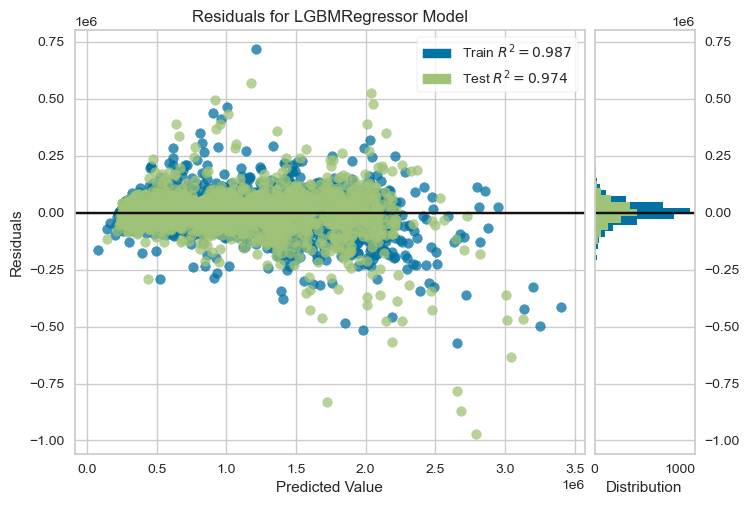

In [51]:
plot_model(best, plot = 'residuals')

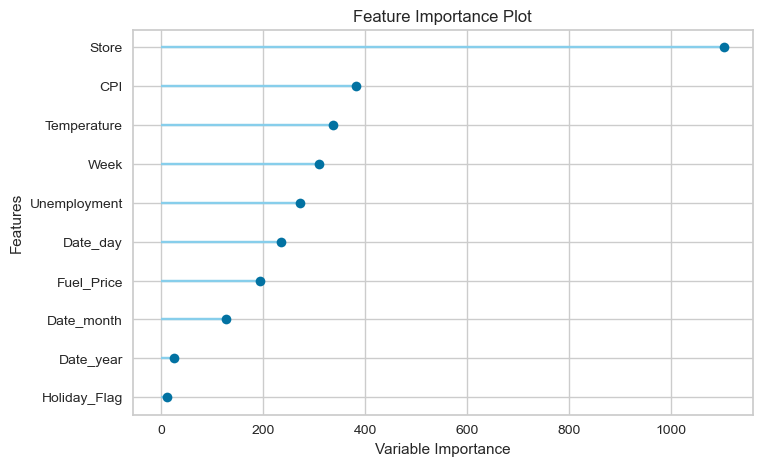

In [52]:
plot_model(best, plot = 'feature')

In [53]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,53455.5604,8650120533.1746,93006.0242,0.9736,0.0908,0.0583


,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Weekly_Sales,prediction_label
2689,19,2012-04-20,0,55.200001,4.170,137.923065,8.150,16,4,2012,1.255087e+06,1.354296e+06
2601,19,2010-08-13,0,72.709999,2.923,132.630005,8.099,32,8,2010,1.418027e+06,1.452892e+06
6206,44,2011-03-11,0,41.279999,3.346,128.399506,7.224,10,3,2011,2.844961e+05,2.939961e+05
5926,42,2011-04-22,0,75.930000,3.917,128.955307,8.494,16,4,2011,5.345977e+05,5.534747e+05
5863,42,2010-02-05,0,54.340000,2.962,126.442062,9.765,5,2,2010,5.433840e+05,5.600446e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
1971,14,2012-03-30,0,50.040001,3.953,190.610748,8.424,13,3,2012,1.905033e+06,1.789419e+06
2183,16,2010-10-29,0,35.759998,2.748,190.951721,6.986,43,10,2010,4.950225e+05,4.556015e+05
1074,8,2011-07-01,0,87.260002,3.524,218.593750,6.425,26,7,2011,8.836834e+05,8.669054e+05
3720,27,2010-02-19,0,32.439999,2.909,135.465775,8.237,7,2,2010,1.945070e+06,1.603495e+06


In [54]:
predictions = predict_model(best, data=df)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,44953.3053,5449930296.4353,73823.6432,0.9829,0.0785,0.0502


,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Weekly_Sales,prediction_label
0,1,2010-02-05,0,42.310001,2.572,211.096359,8.106,5,2,2010,1643690.875,1.636010e+06
1,1,2010-02-12,1,38.509998,2.548,211.242172,8.106,6,2,2010,1641957.500,1.639408e+06
2,1,2010-02-19,0,39.930000,2.514,211.289139,8.106,7,2,2010,1611968.125,1.646341e+06
3,1,2010-02-26,0,46.630001,2.561,211.319641,8.106,8,2,2010,1409727.625,1.488561e+06
4,1,2010-03-05,0,46.500000,2.625,211.350143,8.106,9,3,2010,1554806.625,1.637367e+06


In [55]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['Date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Holiday_Flag', 'Temperature',
                                              'Fuel_Price', 'CPI',
                                              'Unemployment', 'Week', 'Month',
                                              'Year'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Store'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['Store'],
                                     transformer=TargetEncoder(cols=[],
                                              

In [56]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\HP\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(include=['Date'],
                                    transformer=ExtractDateTimeFeatures())),
                ('numerical_imputer',
                 TransformerWrapper(include=['Holiday_Flag', 'Temperature',
                                             'Fuel_Price', 'CPI',
                                             'Unemployment', 'Week', 'Month',
                                             'Year'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Store'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['Store'],
                                    transf